In [1]:
import requests   # Importing requests to extract content from a url
from bs4 import BeautifulSoup as bs # Beautifulsoup is for web scrapping...used to scrap specific content 
import re 

import matplotlib.pyplot as plt
#pip install wordcloud
from wordcloud import WordCloud

In [2]:
# creating empty reviews list 
oneplus_reviews=[]

In [3]:
for i in range(1,21):
  ip=[]  
  url="https://www.flipkart.com/dabur-chyawanprash-awaleha-3x-immunity-action-clinically-tested-500-g/product-reviews/itm6301fb626f0f9?pid=CHNEZGMNRJTGDFBR&lid=LSTCHNEZGMNRJTGDFBRY0SKUB&marketplace=FLIPKART"+str(i)
  response = requests.get(url)
  soup = bs(response.content,"html.parser")# creating soup object to iterate over the extracted content 
  reviews = soup.find_all("div",attrs={"class",""})# Extracting the content under specific tags  
  for i in range(len(reviews)):
    ip.append(reviews[i].text) 
  oneplus_reviews=oneplus_reviews+ip  # adding the reviews of one page to empty list which in future contains all the reviews

In [4]:
# writng reviews in a text file 
with open("projector.txt","w",encoding='utf8') as output:
    output.write(str(oneplus_reviews))
print(oneplus_reviews)

['Good product', 'nice product no effect yet...nice', 'Product is too good', 'Good product', 'Good quality', 'Must buy and best than all other chawanprash in market.@rs156', 'Purchased it at reasonable rates', 'Excellent product.......', 'good', 'Nice', 'Good product', 'nice product no effect yet...nice', 'Product is too good', 'Good product', 'Good quality', 'Must buy and best than all other chawanprash in market.@rs156', 'Purchased it at reasonable rates', 'Excellent product.......', 'good', 'Nice', 'Good product', 'nice product no effect yet...nice', 'Product is too good', 'Good product', 'Good quality', 'Must buy and best than all other chawanprash in market.@rs156', 'Purchased it at reasonable rates', 'Excellent product.......', 'good', 'Nice', 'Good product', 'nice product no effect yet...nice', 'Product is too good', 'Good product', 'Good quality', 'Must buy and best than all other chawanprash in market.@rs156', 'Purchased it at reasonable rates', 'Excellent product.......', 'go

In [5]:
import os
os.getcwd()
# Joinining all the reviews into single paragraph 
ip_rev_string = " ".join(oneplus_reviews)
ip_rev_string

'Good product nice product no effect yet...nice Product is too good Good product Good quality Must buy and best than all other chawanprash in market.@rs156 Purchased it at reasonable rates Excellent product....... good Nice Good product nice product no effect yet...nice Product is too good Good product Good quality Must buy and best than all other chawanprash in market.@rs156 Purchased it at reasonable rates Excellent product....... good Nice Good product nice product no effect yet...nice Product is too good Good product Good quality Must buy and best than all other chawanprash in market.@rs156 Purchased it at reasonable rates Excellent product....... good Nice Good product nice product no effect yet...nice Product is too good Good product Good quality Must buy and best than all other chawanprash in market.@rs156 Purchased it at reasonable rates Excellent product....... good Nice Good product nice product no effect yet...nice Product is too good Good product Good quality Must buy and b

In [6]:
import nltk
# from nltk.corpus import stopwords

In [7]:
# Removing unwanted symbols incase if exists
ip_rev_string = re.sub("[^A-Za-z" "]+"," ", ip_rev_string).lower()
ip_rev_string = re.sub("[0-9" "]+"," ", ip_rev_string)

In [8]:
# words that contained in iphone XR reviews
ip_reviews_words = ip_rev_string.split(" ")

In [9]:
#TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1,1))
X = vectorizer.fit_transform(ip_reviews_words)
X

<468x26 sparse matrix of type '<class 'numpy.float64'>'
	with 468 stored elements in Compressed Sparse Row format>

In [10]:
with open("C:\\Users\\kanch\\Downloads\\stop.txt","r") as sw:
    stop_words = sw.read()
    
stop_words = stop_words.split("\n")

stop_words.extend(["oneplus","mobile","time","android","phone","device","screen","battery","product","good","day","price"])

ip_reviews_words = [w for w in ip_reviews_words if not w in stop_words]


In [11]:
# Joinining all the reviews into single paragraph 
ip_rev_string = " ".join(ip_reviews_words)

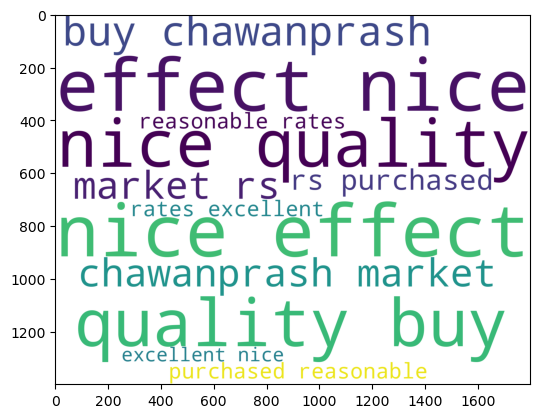

In [12]:
wordcloud_ip = WordCloud(
                      background_color='White',
                      width=1800,
                      height=1400
                     ).generate(ip_rev_string)

plt.imshow(wordcloud_ip)


In [13]:
# positive words # Choose the path for +ve words stored in system
with open("C:\\Users\\kanch\\Downloads\\positive-words.txt") as pos:
  poswords = pos.read().split("\n")


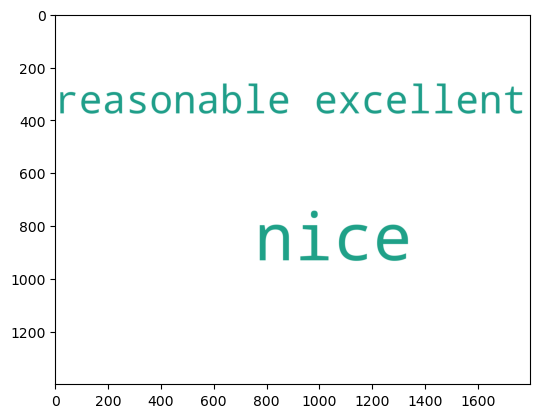

In [14]:
# Positive word cloud
# Choosing the only words which are present in positive words
ip_pos_in_pos = " ".join ([w for w in ip_reviews_words if w in poswords])

wordcloud_pos_in_pos = WordCloud(
                      background_color='White',
                      width=1800,
                      height=1400
                     ).generate(ip_pos_in_pos)
plt.figure(2)
plt.imshow(wordcloud_pos_in_pos)
